# WeatherPy

### Observations and Trends:
- There is an inverse relationship between a city's latitude and temperature. As latitude increases, the temperature decreases.
- The plot for Humidity vs Latitude doesn't show any discernable correleation between latitude and humidity. However, we have to keep in mind the impact that topography and ocean currents have to humidity. Additional data is needed in order to make an accurate assessment. 
- Cities along the equatorial band (-20 to 40) show a pattern of having the greatest measure of cloudiness.  
- There seems to be no observable pattern when trying to correlate wind speed and latitude.


In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Determine city from latitude and longitude
from citipy import citipy

# Get api key from config file, an untracked file in gitignore
from config import api_key

output_files = 'Output/cities.csv'

# Define range of latitudes and longitudes
lat_r=(-90, 90)
lng_r=(-180, 180)

##### Generate List of Cities

In [2]:
# Variable with an empty list to hold cities and lat_long
cities = []
lat_long = []

# Randomize creation of latitude & longitude. Set np size to 1000; change if needed
lat = np.random.uniform(low=-45.00, high=45.00, size=1100)
lng = np.random.uniform(low=-180, high = 180, size=1100)
lat_long = zip(lat, lng)

# Find nearest city with geo coordinates
for lat_lng in lat_long:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

# Validate sufficient number of cities generated        
len(cities)

563

##### API Calls

In [3]:
# Set up api endpoints
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

# Setup URL query
query_url = f'{base_url}appid={api_key}&units={units}&q='

# Dictionary of variables where data from api calls will be stored
city_data = {'City_Name':[], 'City_Lat':[], 'City_Long':[], 'Temperature':[], 'Humidity':[],
             'Cloudiness':[], 'Wind_Speed':[], 'Country':[], 'Date':[]}

In [4]:
# Loop iterating openweather api calls, adding retrieved data into the city_data dictionary.

city_ttls = len(cities)
r = 1

print('Retrieving weather data')
print('-' * 30)

for r, city in enumerate(cities):
    try:
        print(f'Retrieving {city}, number {r} of {city_ttls}.')
        r+=1
        city = requests.get(query_url + city).json()
        city_data["City_Name"].append(city["name"])
        city_data["City_Lat"].append(city["coord"]["lat"])
        city_data["City_Long"].append(city["coord"]["lon"])
        city_data["Temperature"].append(city["main"]["temp"])
        city_data["Humidity"].append(city["main"]["humidity"])
        city_data["Cloudiness"].append(city["clouds"]["all"])
        city_data["Wind_Speed"].append(city["wind"]["speed"])
        city_data["Country"].append(city["sys"]["country"])
        city_data["Date"].append(city["dt"])
        
        # Use timer to delay request to not exceed query limits.
        time.sleep(0.75)
    except:
        print(f'Incomplete record for {city}. Skipping {city}.')
        pass

print(f'Data retrieval completed.')

Retrieving weather data
------------------------------
Retrieving georgetown, number 0 of 563.
Retrieving guerrero negro, number 1 of 563.
Retrieving moerai, number 2 of 563.
Retrieving ayolas, number 3 of 563.
Retrieving quatre cocos, number 4 of 563.
Retrieving busselton, number 5 of 563.
Retrieving rikitea, number 6 of 563.
Retrieving te anau, number 7 of 563.
Retrieving kapaa, number 8 of 563.
Retrieving atuona, number 9 of 563.
Retrieving balabac, number 10 of 563.
Retrieving torbay, number 11 of 563.
Retrieving hervey bay, number 12 of 563.
Retrieving kovur, number 13 of 563.
Retrieving taolanaro, number 14 of 563.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving puerto ayora, number 15 of 563.
Retrieving alice town, number 16 of 563.
Retrieving victor harbor, number 17 of 563.
Retrieving salalah, number 18 of 563.
Retrieving gbarnga, number 19 of 563.
Retrieving jacareacanga, number 20 of 563.
Ret

Retrieving sitka, number 174 of 563.
Retrieving alofi, number 175 of 563.
Retrieving mao, number 176 of 563.
Retrieving san jose, number 177 of 563.
Retrieving pandan, number 178 of 563.
Retrieving bilma, number 179 of 563.
Retrieving tatawin, number 180 of 563.
Retrieving joshimath, number 181 of 563.
Retrieving marcona, number 182 of 563.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving alta floresta, number 183 of 563.
Retrieving calama, number 184 of 563.
Retrieving bhadrak, number 185 of 563.
Retrieving samalaeulu, number 186 of 563.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving elat, number 187 of 563.
Retrieving burnie, number 188 of 563.
Retrieving along, number 189 of 563.
Retrieving dilla, number 190 of 563.
Retrieving karratha, number 191 of 563.
Retrieving kuhdasht, number 192 of 563.
Retrieving makakilo cit

Retrieving kulhudhuffushi, number 338 of 563.
Retrieving vila velha, number 339 of 563.
Retrieving jiddah, number 340 of 563.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving kalmunai, number 341 of 563.
Retrieving malanje, number 342 of 563.
Retrieving marsh harbour, number 343 of 563.
Retrieving nurota, number 344 of 563.
Retrieving yueyang, number 345 of 563.
Retrieving sinnamary, number 346 of 563.
Retrieving samusu, number 347 of 563.
Incomplete record for {'cod': '404', 'message': 'city not found'}. Skipping {'cod': '404', 'message': 'city not found'}.
Retrieving alappuzha, number 348 of 563.
Retrieving tabou, number 349 of 563.
Retrieving pemangkat, number 350 of 563.
Retrieving merauke, number 351 of 563.
Retrieving miyakonojo, number 352 of 563.
Retrieving ibipeba, number 353 of 563.
Retrieving newcastle, number 354 of 563.
Retrieving muros, number 355 of 563.
Retrieving pontes e lacerda, number

Retrieving bredasdorp, number 510 of 563.
Retrieving poum, number 511 of 563.
Retrieving takoradi, number 512 of 563.
Retrieving kieta, number 513 of 563.
Retrieving isla mujeres, number 514 of 563.
Retrieving sakaiminato, number 515 of 563.
Retrieving ambilobe, number 516 of 563.
Retrieving miram shah, number 517 of 563.
Retrieving moshi, number 518 of 563.
Retrieving soverato, number 519 of 563.
Retrieving akom, number 520 of 563.
Retrieving coronado, number 521 of 563.
Retrieving tadine, number 522 of 563.
Retrieving marienburg, number 523 of 563.
Retrieving ligayan, number 524 of 563.
Retrieving rocha, number 525 of 563.
Retrieving guanica, number 526 of 563.
Retrieving leh, number 527 of 563.
Retrieving mecca, number 528 of 563.
Retrieving beira, number 529 of 563.
Retrieving port victoria, number 530 of 563.
Retrieving chulumani, number 531 of 563.
Retrieving laje, number 532 of 563.
Retrieving bambanglipuro, number 533 of 563.
Retrieving batemans bay, number 534 of 563.
Retrievi

In [5]:
# Create New Dataframe From City Data
city_data_df = pd.DataFrame(city_data)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit = 's')
city_data_df.to_csv('Output/city_data.csv')

# city_data_df.dtypes  -- used to validate dtype; uncomment to test

city_data_df.head()

,City_Name,City_Lat,City_Long,Temperature,Humidity,Cloudiness,Wind_Speed,Country,Date
0,George Town,5.4112,100.3354,80.08,82,20,1.01,MY,2021-06-16 01:28:43
1,Guerrero Negro,27.9769,-114.0611,68.70,74,48,14.29,MX,2021-06-16 01:32:19
2,Moerai,-22.4333,-151.3333,74.64,75,96,24.52,PF,2021-06-16 01:32:20
3,Juan de Ayolas,-27.4000,-56.9000,53.94,83,56,10.09,PY,2021-06-16 01:32:21
4,Quatre Cocos,-20.2078,57.7625,70.09,85,13,5.86,MU,2021-06-16 01:32:22


### Plotting City Data

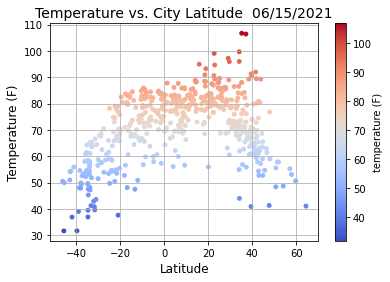

In [6]:
# Plot relationship of Temperature (F) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Temperature'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title(f'Temperature vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/temperature-vs-latitude.png')
plt.show()

#### Temperature vs City Latitude:
The code is analyzing the relationship between the city latitude and temperature. Data is taken from city_data_df, using 'o' as a marker to plot the City_Lat and Temperature as x,y coordinates. Matpltlib's built in colormap is used to map colors to numbers, where the lowest temperature is blue, and the highest temperature is red. 


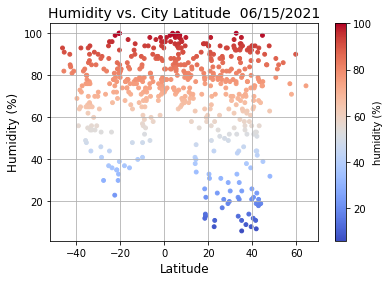

In [7]:
# Plot relationship of Humidity (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Humidity'], 
           c =city_data_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Humidity (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("humidity (%)", labelpad=+1)
plt.grid(True) # add (True) for test

plt.savefig('Images/humidity-vs-latitude.png')
plt.show()

#### Humidity vs City Latitude:
The code is analyzing the relationship between the city latitude and humidity.

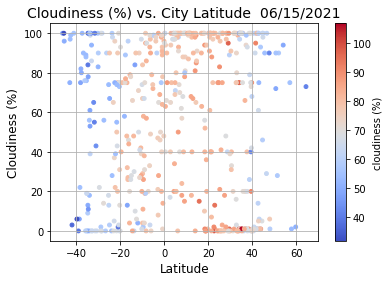

In [8]:
# Plot relationship of Cloudiness (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Cloudiness'], 
           c =city_data_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Cloudiness (%) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("cloudiness (%)", labelpad=+1)
plt.grid() # add (True) for test

plt.savefig('Images/cloudiness-vs-latitude.png')
plt.show()

#### Cloudiness vs City Latitude:
The code is analyzing the relationship between the city latitude and cloudiness. 

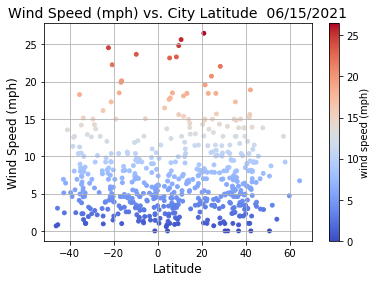

In [9]:
# Plot relationship of Wind Speed (%) vs. Latitude
plt.scatter(city_data_df['City_Lat'], city_data_df['Wind_Speed'], 
           c =city_data_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

plt.title('Wind Speed (mph) vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
cbar= plt.colorbar()
cbar.set_label("wind speed (mph)", labelpad=+1)
plt.grid()

plt.savefig('Images/wind_speed-vs-latitude.png')
plt.show()

#### Wind Speed vs. Latitude
The code is analyzing the relationship between the city latitude and wind speed.

### Linear Regression


In [10]:
#Linear Regression plot function

def linear_regres(x, y, ax=None):
    ax=ax
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f'R Squared is: {rvalue**2}')
    
    # Print statement based on evaluation if rvalue condition is true/false.
    if rvalue <0.0:
        print('The regression displays a negative correlation')
    elif 0.0 < rvalue < 0.05:
        print('The regression displays a neutral correlation')
    else:
        print('The regression displays a positive correlation')
    
    regression_values = slope * x + intercept
    
    # Linear regression equation
    linear_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
                                                          
    # Plot linear regression
    ax.plot(x, regression_values, color='red')
    
    # End linear regression function and return results
    return ax, linear_eq

In [11]:
# Create dataframes and dict for N. Hemisphere (latitude >=0) and S. Hemisphere (latitude <0)
northern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) >= 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df['City_Lat']).astype(float) < 0, :]

n_latitude = northern_df['City_Lat']
n_temperature = northern_df['Temperature']
n_humidity = northern_df['Humidity']
n_cloudiness = northern_df['Cloudiness']
n_windspeed = northern_df['Wind_Speed']

s_latitude = southern_df['City_Lat']
s_temperature = southern_df['Temperature']
s_humidity = southern_df['Humidity']
s_cloudiness = southern_df['Cloudiness']
s_windspeed = southern_df['Wind_Speed']
# print(n_latitude)  -- test if dict is valid

R Squared is: 0.16963966260594024
The regression displays a negative correlation


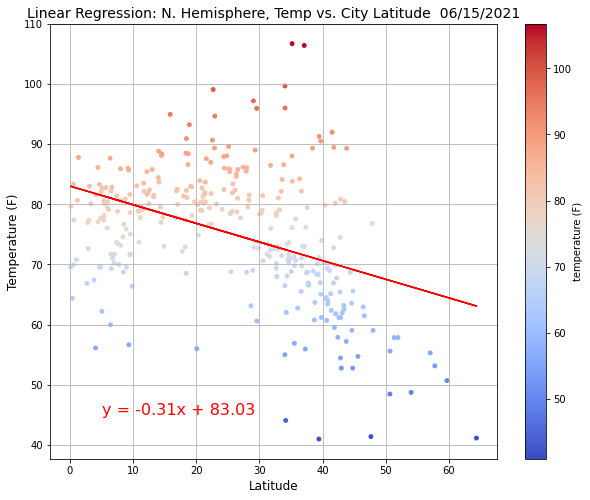

In [12]:
# Northern Hemisphere - Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(n_latitude, n_temperature, ax)

plt.title(f'Linear Regression: N. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("temperature (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_temp-vs-lat.png')
plt.show()

R Squared is: 0.5244376897156608
The regression displays a positive correlation


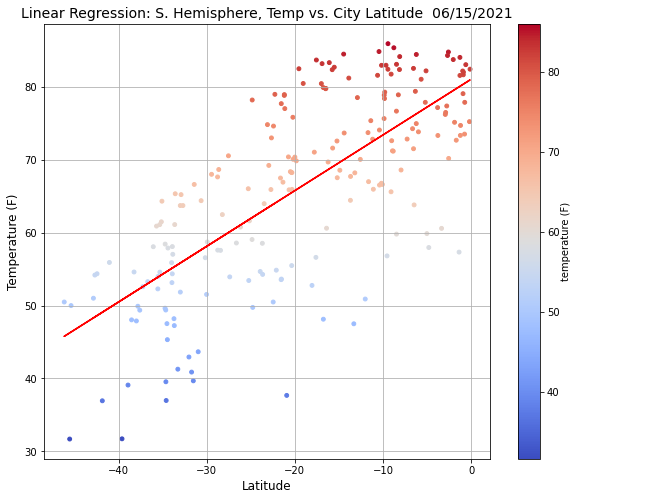

In [13]:
# Southern Hemisphere - Temperature (F) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Temperature'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(s_latitude, s_temperature, ax)

plt.title(f'Linear Regression: S. Hemisphere, Temp vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Temperature (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('temperature (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_temp-vs-lat.png')
plt.show()

R Squared is: 0.0726597271889788
The regression displays a negative correlation


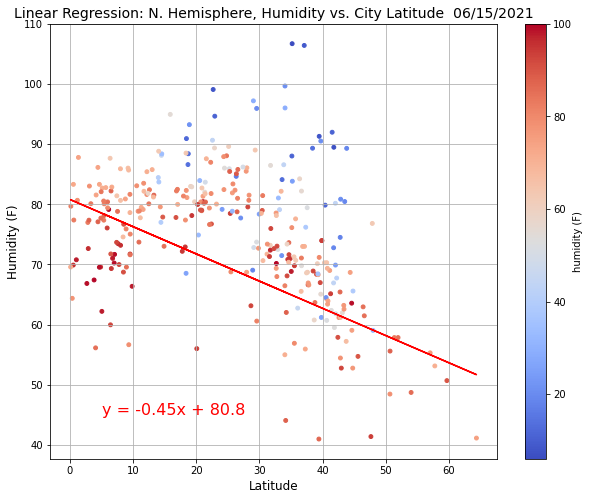

In [14]:
# Northern Hemisphere - Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(n_latitude, n_humidity, ax)

plt.title(f'Linear Regression: N. Hemisphere, Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Humidity (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("humidity (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_humidity-vs-lat.png')
plt.show()

R Squared is: 0.010811537317757847
The regression displays a positive correlation


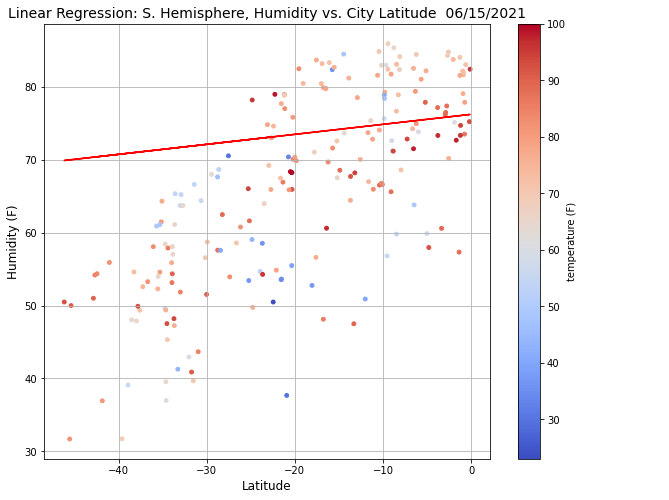

In [15]:
# Southern Hemisphere - Humidity (%) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Humidity'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(s_latitude, s_humidity, ax)

plt.title(f'Linear Regression: S. Hemisphere, Humidity vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Humidity (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('temperature (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_humidity-vs-lat.png')
plt.show()

R Squared is: 0.0726597271889788
The regression displays a negative correlation


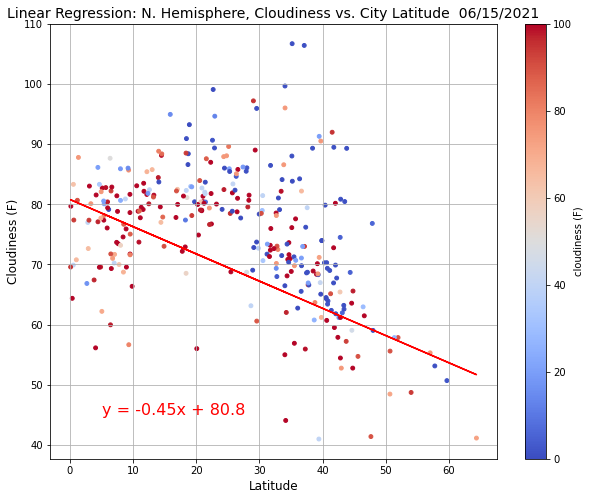

In [16]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Cloudiness'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(n_latitude, n_humidity, ax)

plt.title(f'Linear Regression: N. Hemisphere, Cloudiness vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Cloudiness (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label("cloudiness (F)", labelpad=+1)
plt.grid()
plt.savefig('Images/NH_lin_regres_cloudiness-vs-lat.png')
plt.show()

R Squared is: 0.010811537317757847
The regression displays a positive correlation


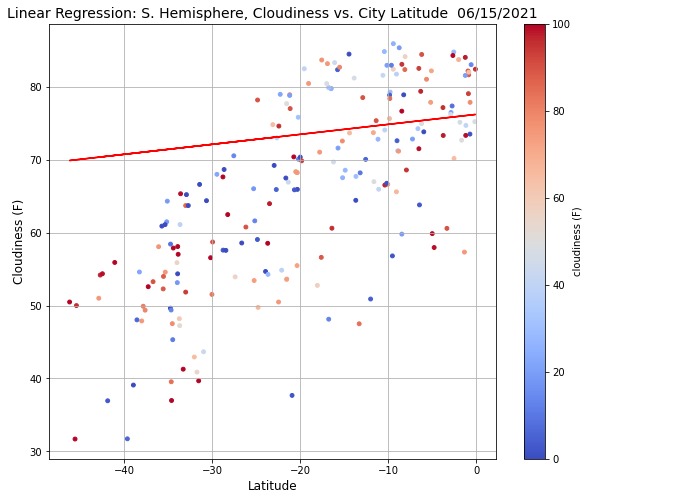

In [17]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Cloudiness'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(s_latitude, s_humidity, ax)

plt.title(f'Linear Regression: S. Hemisphere, Cloudiness vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Cloudiness (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('cloudiness (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_cloudiness-vs-lat.png')
plt.show()

R Squared is: 0.0726597271889788
The regression displays a negative correlation


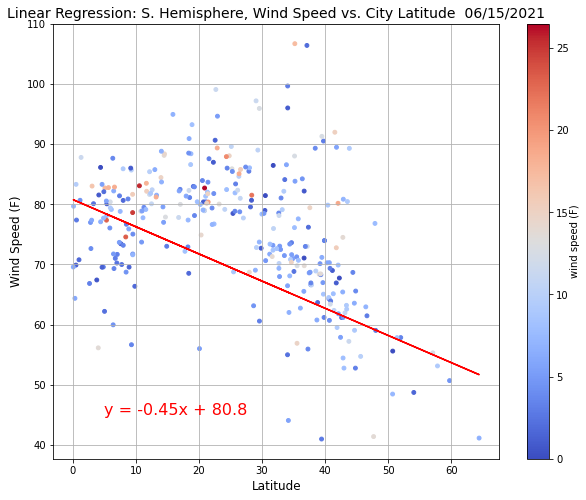

In [18]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(n_latitude, n_temperature, 
           c =northern_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(n_latitude, n_humidity, ax)

plt.title(f'Linear Regression: S. Hemisphere, Wind Speed vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Wind Speed (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('wind speed (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_wind_speed-vs-lat.png')
plt.show()

R Squared is: 0.010811537317757847
The regression displays a positive correlation


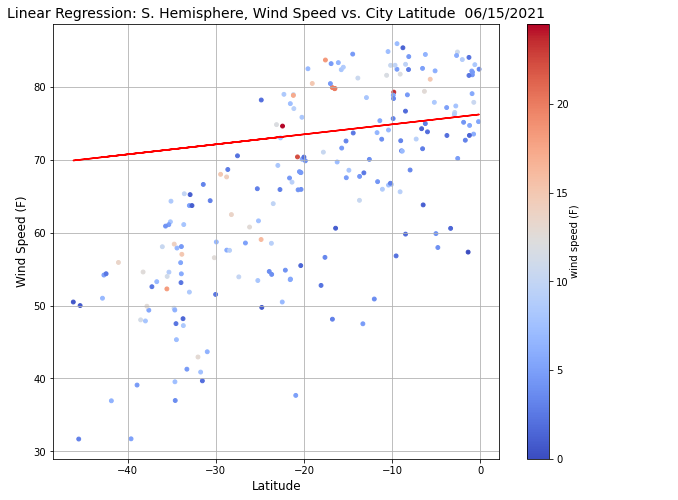

In [19]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(s_latitude, s_temperature, 
           c =southern_df['Wind_Speed'], s=15, cmap= 'coolwarm', marker='o')

# Run linear regression plot function
ax, linear_eq = linear_regres(s_latitude, s_humidity, ax)

plt.title(f'Linear Regression: S. Hemisphere, Wind Speed vs. City Latitude  ' + time.strftime('%m/%d/%Y'), fontsize=14 )
plt.ylabel('Wind Speed (F)', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

# Annotate linear regression equation on plot
plt.annotate(linear_eq,(5,45),fontsize=16, color='red')

# Insert colorbar to indicate what info is being displayed
cbar= plt.colorbar()
cbar.set_label('wind speed (F)', labelpad=+1)
plt.grid()
plt.savefig('Images/SH_lin_regres_wind_speed-vs-lat.png')
plt.show()